In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

In [4]:
#City Data
city_data_df = pd.read_csv(city_data)
city_data_df = city_data_df.drop_duplicates("city")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
#Ride Data
ride_data_df = pd.read_csv(ride_data)
#ride_data_df = ride_data_df.drop_duplicates("city")
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
#Merge Both The Data
pyber_data = pd.merge(ride_data_df, city_data_df, on="city", how="left")
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
#Grouping by City
city_group = pyber_data.groupby(["city"])

#Average fare per city
average_fare = city_group["fare"].mean()
print(average_fare)

#Total Number of Rides per City
total_rides = city_group["ride_id"].count()
print(total_rides)

#Total Number of Drivers per City
total_drivers = city_group["driver_count"].mean()
print(total_drivers)

#City Type(Urban, Suburban, Rural)
city_type = city_data_df.set_index(["city"])["type"]
city_type.value_counts()
print(city_type)

city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [8]:
#Pyber City Dataframe
pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type
})
pyber_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [9]:
#Urban
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]

#suburban
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]

#rural
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]

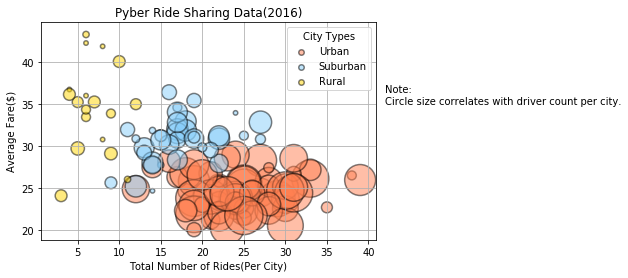

In [10]:
#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], marker="o", color = "coral", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], marker="o", color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], marker="o", color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.text(42, 35,"Note:\nCircle size correlates with driver count per city.")

#Add the legend.
legend = plt.legend(loc= "best", title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

#Save Figure
plt.savefig("./Images/pyber_ride.png")

#Show plot.
plt.grid()
plt.show()



In [11]:
#Total Fares by City Types
total_fare = pyber_data.groupby(["type"])["fare"].sum()
total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [12]:
#Indexing for Wedge Labels
total_fare.index
print(total_fare.index)
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')


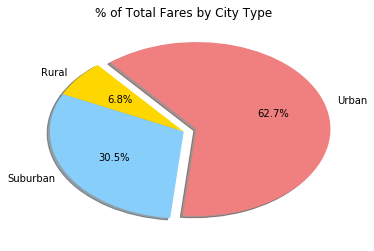

In [13]:
#Create Pie Chart
plt.pie(total_fare, labels = total_fare.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 130)
plt.title("% of Total Fares by City Type")
plt.savefig("./Images/total_fare.png")
plt.show()


In [14]:
#Total Rides by City Types
total_rides = pyber_data.groupby(["type"])["ride_id"].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [15]:
#Indexing for Wedge Labels
total_rides.index
print(total_rides.index)
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')


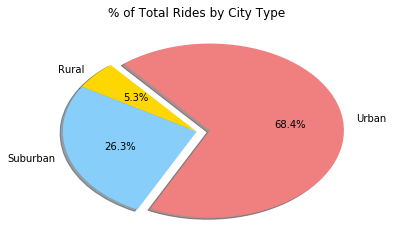

In [16]:
#Create Pie Chart
plt.pie(total_rides, labels = total_rides.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 130)
plt.title("% of Total Rides by City Type")
plt.savefig("./Images/total_rides.png")
plt.show()

In [17]:
#Total Drivers by City Types
total_drivers = city_data_df.groupby(["type"])["driver_count"].sum()
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [18]:
#Total percent of Drivers
sum_of_drivers = (total_drivers[0] + total_drivers[1] + total_drivers[2])
sum_of_drivers

rural_drivers_percent = (total_drivers[0]/sum_of_drivers) *100
suburban_drivers_percent = (total_drivers[1] / sum_of_drivers)* 100
urban_drivers_percent = (total_drivers[2] /sum_of_drivers)*100



In [19]:
#Indexing for Wedge Labels
total_percent = [rural_drivers_percent, suburban_drivers_percent, urban_drivers_percent]
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

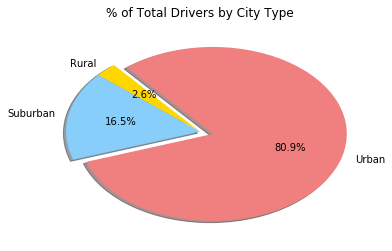

In [20]:
#Create Pie Chart
plt.pie(total_percent, labels = labels, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 130)
plt.title("% of Total Drivers by City Type")
plt.savefig("./Images/total_driver.png")
plt.show()

# Analysis:
1.There is a correlation between number of rides and the average fare per city. Urban cities had the highest number of rides, the highest number of drivers and had the lowest average fare of the three city types.

2.Even though rural cities had the highest average fare per city, the rural cities had the smallest segment of the total fares by city pie chart at 6.8%.

3.Urban cities had the largest percentage of total rides(68.4%), largest percentage of drivers(80.9%) and the largest percentage of total fares(62.7%).